# Homework 3


Please follow the guidelines in Sec ***9. Homework Projects*** of the Syllabus. 

Homework projects must be submitted via Canvas as a *working* Jupyter notebook.

## Question 1


The following [Poisson's equation](https://en.wikipedia.org/wiki/Poisson%27s_equation) in 1D
$$
    \frac{d^2}{dx^2} \phi(x) = 2\exp(-x^2),
$$
has the exact solution
$$
    \phi(x) = \sqrt{\pi}\, {\rm erf}\, (x) x + \exp(-x^2) + C_1 x + C_2,
$$
where ${\rm erf}$ is [the error function](http://dlmf.nist.gov/7.2.i) implemented in the library [SpecialFunctions.jl](https://specialfunctions.juliamath.org/v0.1/), $C_1$ and $C_2$ are arbitrary constants. 


1) Numerically solve this inhomogenious Laplace's equation by using the central finite-difference method.
2) What values of the constants $C_1$ and $C_2$ should be chosen so that the obtained numerical solutions closely overlaps (on the plot) with the exact solution?


**Note:**

In Julia, to find the unknown vector $x$ in the linear system of equations $Ax = y$, we use the command `A \ y`.

Consider the following example: Let's say the matrix $A$ is defied as

## Problem 1
The numerical approximation is implemented by generating a grid, calling the second derivative at the grid points then dividing by the step size. 
This solution is backsolved with the original matrix to yield a vector consisting of the numerical approximation. 

Depending on the range used for the numerical approximation, two constants (two steps of integration) are required to fit the exact solution with the numerical solution. 

The two solution vectors are subtracted, yielding a difference vector of C1x+C2. Since our difference vector was constant, C1 was 0, and C2 was 17.76. This was added to the exact equation resulting in perfect overlap. 

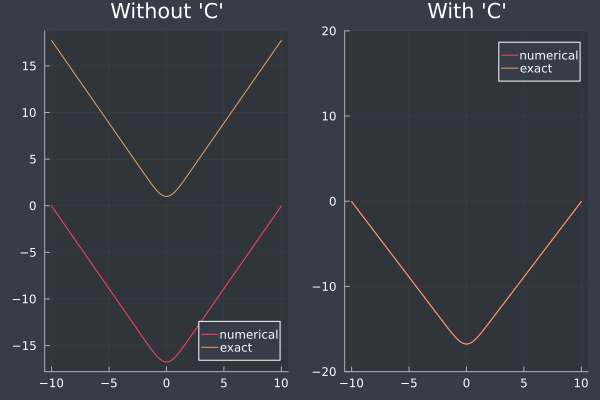

C1=0, C2=17.759993488345913

In [137]:

using LinearAlgebra, Plots, SpecialFunctions,Statistics
theme(:dark)
x=collect(-10:.02:10)
Δx=.02
N=length(x)
B = 2 .*exp.(-x.^2)
A = zeros(N,N)
for i in 1:N, j in 1:N
  abs(i-j)<=1 && (A[i,j]+=1)
  i==j && (A[i,j]-=3)
end
A = A/(Δx^2)
numerical_sol=A\B
#
exact_fun=x->sqrt(pi).*erf.(x).*x+exp.(-x.^2)
exact_sol=exact_fun(x)
diff=exact_sol-numerical_sol
c2=mean(diff)
c1=0
exact_fun1=x->sqrt(pi).*erf.(x).*x+exp.(-x.^2) +c1 .*x  .-c2
exact_sol1=exact_fun1(x)
#
pt1=Plots.plot(x,numerical_sol,label="numerical")
Plots.plot!(pt1,x,exact_sol,label="exact",title="Without 'C'")
pt2=Plots.plot(x,numerical_sol,label="numerical")
Plots.plot!(pt2,x,exact_sol1,label="exact",title="With 'C'")
##
ylims!(pt2,-20,20)
display(plot(pt1,pt2))
gui()

print("C1=",c1, ", C2=",c2)

## Question 2

In [class](https://wavetulane-my.sharepoint.com/:o:/g/personal/dbondar_tulane_edu/EjZjkvTFp4tNrthBttdxEJQBwxTUBJotcnkl_vWWOoY_XA?e=AjzyDr), using the central finite difference approximation, we have derived the matrix representation of the time independent Schrödinger equation with the boundary conditions that the wave function vanishes outside of the coordinate grid, i.e., $\psi(x_{0}) = \psi(x_{N+1}) = 0$.

Derive the matrix representation of the time independent Schrödinger equation with the periodic boundary condition, i.e., $\psi(a) = \psi(b)$ and $\psi'(a) = \psi'(b)$.

**Note**

The first condition is discretized as 
$$
  \psi(a) = \psi(b) \Longrightarrow \psi(x_0) = \psi(x_N).
$$

Whereas, the second condition is discretized as 
$$
    \psi'(a) = \psi'(b) \Longrightarrow
$$

$$
    \frac{\psi(x_1) - \psi(x_0)}{\Delta x} = \frac{\psi(x_{N+1}) - \psi(x_{N})}{\Delta x}
    \Longrightarrow
$$
$$
    \psi(x_1) - \psi(x_N) = \psi(x_{N+1}) - \psi(x_{N})
    \Longrightarrow
$$
$$
    \psi(x_1) = \psi(x_{N+1}).
$$

## Analytical Solution
Time independent Schrodinger EQ is discretized as:
$$
\begin{align}
	-\frac{\psi(x_{k+1}) - 2\psi(x_{k})  + \psi(x_{k - 1})}{2\Delta x^2} + U(x_k)  \psi(x_{k}) = E  \psi(x_{k}),
	\qquad k=1,1,2,\ldots,N,
\end{align}
$$
Matrix representation of time independent Schrodinger eqaution has periodic boundary condition:

(1)   $$\psi(x_{0}) = \psi(x_{N+1}) = 0$$

In discrete form,

(2)  $$\psi'(a) = \psi'(b)$$
and
$$
    \psi(x_1) = \psi(x_{N+1}).
$$
Central finite difference method:
$$
\begin{align}
	f'(x) &\approx [ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\left( \Delta x^2 \right) \Longrightarrow {CentralFinitDiffApprox} \\
	f''(x) &\approx  [ f'(x+\Delta x/2) - f'(x-\Delta x/2) ] / \Delta x  = [ f(x + \Delta x) - 2f(x) + f(x- \Delta x)] / \Delta x^2  + O\left( \Delta x^2 \right). 
\end{align}
$$


Listing K values, then adjusting for boundary conditions yields a pattern:

K=1$$-\frac{\psi(x_2) - 2\psi(x_1)+\psi(x_0)}{2\Delta x^2} + U(x_1)  \psi(x_1) = E \psi(x_1)$$

K=2$$\frac{\psi(x_3) - 2\psi(x_2)+\psi(x_1)}{2\Delta x^2} + U(x_2)  \psi(x_2) = E  \psi(x_2)$$
K=...$$...$$\
K=$N-1$ $$\frac{\psi(x_N) - 2\psi(x_{N-1})+\psi(x_{N-2})}{2\Delta x^2} + U(x_{N-1})  \psi(x_{N-1}) = E  \psi(x_{N-1})$$
K=$N$ $$\frac{\psi(x_{N+1}) - 2\psi(x_{N})+\psi(x_{N-1})}{2\Delta x^2} + U(x_N)  \psi(x_N) = E  \psi(x_N)=\frac{\psi(x_{1}) - 2\psi(x_{N})+\psi(x_{N-1})}{2\Delta x^2} + U(x_N)  \psi(x_N)$$


This pattern is represented as a matrix and is the Hermitian finite dimensional approximation of the above Hamiltonian:
\
\
$(\frac{-1}{2\Delta x^2})$ *
$\begin{pmatrix}
-2 & 1       & 0      & 0     & \cdots & 0 & 0  & 0  & 1 \\
1  & -2      & 1      & 0     & \cdots & 0 & 0  & 0  & 0 \\ 
 \ddots  &  \ddots & \ddots & \ddots &    \ddots     &  \ddots  &  \ddots   &  \ddots   &  \ddots  \\
0  & 0       & 0      & 0     & \cdots & 0 & 1  & -2 & 1  \\
1  & 0       & 0      & 0     & \cdots & 0 & 0  & 1  & -2 \\
\end{pmatrix}$
+
$\begin{pmatrix}
U(x_1) &       &       &       &       &          &           &         \\   
       &U(x_2)&       &       &       &          &           &          \\   
       &      &       & \ddots&       &          &           &          \\ 
       &      &       &       & \ddots&          &           &          \\        
       &      &       &       &       &          & U(x_{N-1})&          \\   
       &      &       &       &       &          &           & U(x_{N}) \\
       \end{pmatrix}$
       $\begin{pmatrix}
\Psi(x_1) \\
\Psi(x_2) \\
\Psi(x_{N-1}) \\
\Psi(x_{N}) \\ \end{pmatrix}$= E
$\begin{pmatrix}
\Psi(x_1) \\
\Psi(x_2) \\
\Psi(x_{N-1}) \\
\Psi(x_{N}) \\ \end{pmatrix}$

In [1]:
function energies_Q2(U::Function, a::Real, b::Real, N::Int)
    m=range(1,N,10)
    x=a.+((m.-1).*(b-a))./N
    Δx = x[2] - x[1]
   
    Hamiltonian =  -1/(2*Δx^2) * diagm(
        -1 => ones(N-1), 
        0 => -2*ones(N), 
        1 => ones(N-1),
        (N-1)=>ones(1),
        (-N+1)=>ones(1)
    )

    Hamiltonian 
    
end
num_energies = energies_Q2(x -> 0.5 * x ^ 2,0,1,100)

UndefVarError: UndefVarError: diagm not defined

## Question 3

Using the derived matrix in the previous question, numerically find the eigenenergies of the Schrödinger equation for a particle in the box with the periodic boundary condition and $a=0$ and $b=1$. 

By plotting, compare the numerically obtained result with the exact energies $E_n = 2 (\pi n)^2$, where $n=0, \pm 1, \pm 2, \pm 3, \ldots$.

**Note** that for the periodic boundary conditions, the coordinate grid needs to be chosen differently that for the particle-in-the-box case (i.e., not like `range(a, b, N)`). The accurate choice is

$$
    x_m = a + (m - 1)(b - a) / N, \qquad m =1,2, \ldots N.
$$
Note that $x_N < b$! Ask me (Denys Bondar) if you want to know why exactly it should be done this way.

In [2]:
using LinearAlgebra
function energies_Q2(U::Function, a::Real, b::Real, N::Int)
    m=range(1, N, N)
    x = a.+((m.-1).*(b-a)/N)
    Δx = x[2] - x[1]
   
    Hamiltonian =  -1 ./(2*(Δx)^2) * diagm(
        -1 => ones(N-1), 
        0 => -2*ones(N), 
        1 => ones(N-1),
        (N-1)=>ones(1),
        (-N+1)=>ones(1))

    Hamiltonian += diagm(U.(x))
    return eigvals(Hamiltonian)
end
energies= energies_Q2(x -> 0,0,1,1000)


1000-element Vector{Float64}:
   2.4414248400717042e-11
  19.73914386272463
  19.739143863028804
  78.95579618399702
  78.95579618419808
 177.64761919098163
 177.64761919118286
 315.81071670014336
 315.81071670040313
 493.43963426849604
   ⋮
   1.9996841892832983e6
   1.9996841892832997e6
   1.999822352380808e6
   1.9998223523808091e6
   1.9999210442038153e6
   1.9999210442038171e6
   1.9999802608561367e6
   1.9999802608561367e6
   1.9999999999999998e6

In [3]:
using LinearAlgebra
n = range(1,length(energies)+1,1000)
exact_energies1=2 .*(pi.*n).^2

1000-element Vector{Float64}:
   19.739208802178716
   79.03589085854118
  177.8900659478339
  316.3017340700569
  494.27089522521015
  711.7975494132935
  968.8816966343074
 1265.5233368882516
 1601.7224701751259
 1977.4790964949298
    ⋮
    1.9463513170965433e7
    1.950277394324312e7
    1.9542074273013845e7
    1.9581414160277605e7
    1.962079360503439e7
    1.9660212607284214e7
    1.969967116702707e7
    1.9739169284262955e7
    1.9778706958991878e7

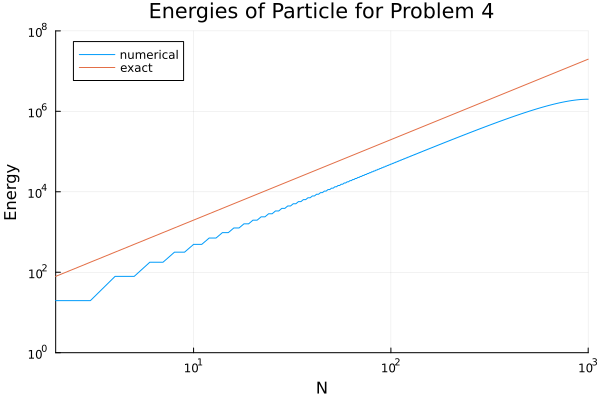

In [4]:
using Plots
theme(:default)
plot(energies,label="numerical",xlabel="N", ylabel="Energy", title="Energy vs N", legend=:topleft,yscale=:log10,xscale=:log10,xlims=(2,1000),ylims=(1,10^8))
plot!(exact_energies1,label="exact",title="Energies of Particle for Problem 4",)


## Question 4: extra credit for 3170, required for 6170

In condensed matter physics, electronic properties of crystals are modeled by solving the time-independent Schrödinger equation with a periodic potential. According to the 1D version of [the Bloch’s theorem](https://en.wikipedia.org/wiki/Bloch%27s_theorem), the solution $\psi(x)$ of the Schrödinger equation for a periodic potential $U(x + L) = U(x)$ is of the form
$$
\psi(x) = e^{ikx} u(x),
$$
where $u(x + L) = u(x)$ is a periodic function and the real parameter $k$ is called the crystal momentum vector.

If this form for $\psi(x)$ is substituted back into the Schrödinger equation, we obtain (see [the derivation here](https://en.wikipedia.org/wiki/Bloch%27s_theorem)):
$$
 \left[\frac{1}{2} \left(-i\frac{d}{dx} + k\right)^2 + U(x) \right] u_n(x) = E_n(k) u_n(x).
$$
Note that $k$ became just a real parameter. 

In other words, to find the electronic bands $E_n(k)$, where $n$ is known as the band index and $-\pi / L \leq k \leq\pi / L$ (this range of $k$ is known as the first Brillouin zone in 1D), we need to find the eigenenergies  for the following Schrödinger equation with the periodic boundary condition

$$
 \left[-\frac{1}{2}\frac{d^2}{dx^2} -ik\frac{d}{dx}  + \frac{k^2}{2} + U(x) \right] u_n(x) = E_n(k) u_n(x).
 \qquad\qquad 
$$

Your task is to use the central finite difference method to calculate $E_n(k)$ as a function of $k$ for $n=1$ and $n=2$. $U(x)=\cos(x)$, $0 \leq x < L$, and $L=2\pi$. Plot  these $E_{1,2}(k)$.

**Hint**: For every value of $k$ in the interval $[-\pi/L, \pi/L]$ you need to find the first two eigenvalues of equation (1). Also recall that

$$
[ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\left( \Delta x^2 \right)
$$
$$
\Longrightarrow \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x} = f'(x) + O\left( \Delta x^2 \right).
$$

## First we must identify the discretized matrix for the above problem
Given the following central difference methods:
$$
f'(x) = [ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\Delta x^2 \\
	f''(x) = [ f'(x+\Delta x/2) - f'(x-\Delta x/2) ] / \Delta x  = [ f(x + \Delta x) - 2f(x) + f(x- \Delta x)] / \Delta x^2  + O\Delta x^2)
$$
The given schrodinger equation becomes:
$$
[\frac{f(x+\Delta x)-2f(x)-f(x-\Delta x)}{-\frac{1}{2}\Delta x^2}-\frac{ik}{2\Delta x}((f(x+\Delta x)-f(x-\Delta x))+(\frac{k^2}{2})+cos(x)]u_n(x)=E_n(k)u_n(x)$$
Distributing $U_n(x)$ yields the following solution:
$$
[\frac{\psi(x_{N+1})-2\psi(x_{N})-\psi(x_{N-1})}{-\frac{1}{2}\Delta x^2}-\frac{ik}{2\Delta x}((\psi(x_{N+1})-\psi(x_{N-1}))+(\frac{k^2}{2})+cos(x_N)]=E_n(k)$$


Now imposing periodic boundary conditions of 
$$
    \psi(x_1) = \psi(x_{N+1}).
$$
and 
$$\psi(x_{0}) = \psi(x_{N+1}) = 0$$
Yields the following:
$$
[\frac{\psi(x_1)-2\psi(x_{N})-\psi(x_{N-1})}{-\frac{1}{2}\Delta x^2}-\frac{ik}{2\Delta x}((\psi(x_1)-\psi(x_{N-1}))+(\frac{k^2}{2})+cos(x_N)]=E_n(k)
$$
Now this is expressed via matrix by the following function:

In [1]:
using LinearAlgebra
function prob_4_energies(U::Function,a::Real,b::Real,N::Real,k::Real)
    x = zeros(N)
    for m in 1:N
    x[m]= (a + ((m-1)*(b-a)))./ N
    end 
    Δx = x[2] - x[1]
    for t in 1:N
    var1=(1 ./ (2 * Δx^2))
    var2=((im * k)./ (2 * Δx^2))
    hamiltonian=(diagm(
        -1    => var1 * ones(N-1),
        0    => var1 * ones(N),
        1    => - var1 * ones(N-1),
        N-1  => var1 * ones(1),
        -N+1 => - var1 * ones(1) )
        - 
        diagm(
        -1   => var2 * ones(N-1),
        0    => 0 * ones(N),
        1   => - var2 * ones(N-1),
        N-1  => var2 * ones(1),
        -N+1 => - var2 * ones(1) )
        .+cos.(x[t]))
        end
        hamiltonian += diagm(U.(x)) .+(k^2)/2
    return eigvals(hamiltonian)
    end

prob_4_energies (generic function with 1 method)

In [5]:
L=2*pi
N=100
k=range(-pi/L,pi/L,N)
lev1=zeros(N)
lev2=zeros(N)
for i in 1:N
    energies4=zeros(N)
    energies4=prob_4_energies(x -> 0,0,1,N,k[i])
energies4= real.(energies4)
lev1[i]=energies4[1]
lev2[i]=energies4[2]
end




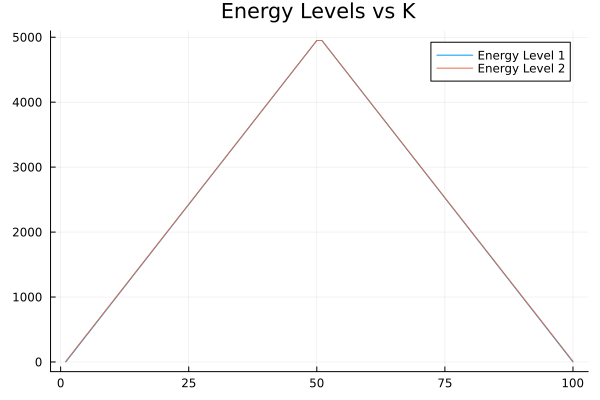

In [4]:
## Plotting
using Plots
theme(:default)
plot(lev1,label="Energy Level 1",title="Energy Levels vs K")
plot!(lev2,label="Energy Level 2")

## Question 5: extra credit for 3170, required for 6170

Using the same system as in Question 4, we will seek the numerical solution of equation (1) by expanding the unknown eigenfunction $u(x)$ (we drop the band index $n$ for convenience) into the following basis
$$
u(x) = \sum_{q=-\infty}^{\infty} a_q f_q(x), \qquad f_q(x) = \frac{\exp(ixq)}{\sqrt{2\pi}}.
 \qquad\qquad 
$$
This representation is known as [the Fourier series](https://en.wikipedia.org/wiki/Fourier_series). It is very easy to see that for such a representation  the function $u(x)$ is indeed periodic $u(x + L) = u(x)$ with the period $L=2\pi$. 


Note that the orthogonality condition for the basis $\{f_q(x)\}$ reads
$$
    \int_0^{2\pi} f_m(x)^* f_q(x) dx = \delta_{m, q},
$$
where $\delta_{m, q}$ is [the Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta).

Following the logic of [in-class derivation](https://wavetulane-my.sharepoint.com/:o:/g/personal/dbondar_tulane_edu/EjZjkvTFp4tNrthBttdxEJQBwxTUBJotcnkl_vWWOoY_XA?e=AjzyDr), derive the ***analytical*** expression for the matrix representation of the Hamiltonian in equation (1).

**Hint:**
$$
    KE_{m,q} = \int_0^{2\pi} f_m(x)^* \left(-\frac{1}{2}\frac{d^2}{dx^2} -ik\frac{d}{dx}  + \frac{k^2}{2} \right) f_q(x) dx.
$$

$$
    PE_{m,q} = \int_0^{2\pi} f_m(x)^* \cos(x) f_q(x) dx.
$$
The latter integral is very easy to calculate analytically by expressing $\cos$ though $\exp$.

## Question 6: extra credit for 3170, required for 6170

Using the matrix representation of the Hamiltonian obtain in the previous question, numerically calculate the electronic bands $E_{1,2}(k)$. Make a plot of $E_1(k)$ and the first band calculated via the finite difference in Question 4. Also plot of $E_2(k)$ and the second band calculated via the finite difference in Question 4.

**Hint:** To get a finite matrix, we need to truncate the series (2) as 
$$
u(x) = \sum_{q=-N}^{N} a_q f_q(x).
$$

The results obtained via this basis expansion method and central finite difference (Question 4) should coincide if calculations are converged.